# Más contrastes de hipótesis con SciPy y Stats Models

## Objetivos de la sesión
En esta sesión aprenderemos más sobre los test que podemos realizar con SciPy. Estos tests nos permiten tomar decisiones basadas en datos y comparar información entre dos o más variables.

## Introducción
La estadística nos ayuda a tomar decisiones utilizando datos. En lecciones anteriores, hemos observado la comparación de una muestra con una constante o la comparación de dos muestras entre sí. En esta lección, usaremos herramientas estadísticas para examinar varias características a la vez. También aprenderemos sobre la regresión lineal usando SciPy.

## ANOVA y el F-Test
ANOVA (o ANalisis Of VAriance) es una técnica destinada a comparar las medias de tres o más muestras independientes. Un ejemplo de cuándo podríamos usar ANOVA es cuando realizamos una prueba en un sitio web de comercio electrónico y probamos múltiples diseños de interfaz de usuario a la vez para ver si hay un cambio en las ventas.

El contraste de hipótesis que estamos examinando es:

${H}_{0}: {\mu}{1}={\mu}{2}=...={\mu}{k}$

${H}_{1}: Por\ lo\ menos\ una\ media\ es\ distinta$

Donde $\mu$ representa una media y hay un total de k medias que estamos comparando.

Típicamente, el ANOVA es una tabla que consiste en valores que nos ayudan a calcular un valor p para nuestra hipótesis. El valor p se obtiene mediante la realización de la prueba F. La prueba F es una prueba para comparar las varianzas.

Veamos un ejemplo. Digamos que tenemos los siguientes datos:

|              ANOVA              | Grupo 1     | Grupo 2     | Grupo 3     |   |
|---------------------------------|-------------|-------------|-------------|---|
| Número de casos                 | ${n}_{1}$   | ${n}_{2}$   | ${n}_{3}$   |   |
| Media de la Muestra             | ${\mu}_{1}$ | ${\mu}_{2}$ | ${\mu}_{3}$ |   |
| Desviación Típica de la Muestra | ${s}_{1}$   | ${s}_{2}$   | ${s}_{3}$   |   |

Nos gustaría comparar estas tres muestras y ver si hay una diferencia significativa en al menos una de ellas.

Con el ANOVA, comparamos la diferencia en la variación entre los grupos y la diferencia en la variación dentro de los grupos mismos. Si el estadístico F es suficientemente grande, significa que el valor p será suficientemente pequeño. Esto nos llevará a rechazar la hipótesis nula y a concluir que existe una variación significativa entre los grupos y, por lo tanto, al menos uno de las medias es diferente.

Así es como construiríamos un ANOVA:

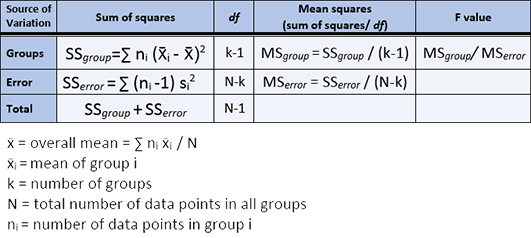

## ANOVA en Python

### Usando SciPy
Hay varias maneras de realizar la prueba ANOVA en Python. La primera es usar SciPy. Podemos pasar todos los grupos a la función `f_oneway`. Esta función devuelve el resultado del contraste de hipótesis.

A continuación se muestra un ejemplo de un conjunto de datos que contiene 8 observaciones de las tasas de interés de préstamos para automóviles en 6 ciudades diferentes. Nos gustaría mostrar que hay una diferencia en las tarifas basadas en la ciudad. El conjunto de datos `rate_by_city.csv` puede obtenerse [aquí](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/rate_by_city.csv).

In [7]:
import pandas as pd
from scipy.stats import f_oneway

#let's load the dataset
rate = pd.read_csv('./data/rate_by_city.csv')
rate.head(15)

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1
5,13.00,1
6,13.00,1
7,12.75,1
8,12.50,1
9,14.25,2


El set de datos contiene dos columnas: tarifa y ciudad. Para probar nuestra hipótesis, necesitamos pasar múltiples subconjuntos filtrados a nuestra función o pivotar el conjunto de datos para tener una columna por ciudad. Escogeremos la segunda opción. Empezaremos usando la función `cumcount` para crear un nuevo índice y luego usaremos la función `pivot` para crear 6 columnas de ciudad. A continuación, cambiaremos el nombre de las columnas para que podamos acceder a ellas más fácilmente.

In [2]:
rate['city_count'] = rate.groupby('City').cumcount()
rate['city_count']

0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     0
10    1
11    2
12    3
13    4
14    5
15    6
16    7
17    8
18    0
19    1
20    2
21    3
22    4
23    5
24    6
25    7
26    8
27    0
28    1
29    2
30    3
31    4
32    5
33    6
34    7
35    8
36    0
37    1
38    2
39    3
40    4
41    5
42    6
43    7
44    8
45    0
46    1
47    2
48    3
49    4
50    5
51    6
52    7
53    8
Name: city_count, dtype: int64

In [3]:
rate_pivot = rate.pivot(index='city_count', columns='City', values='Rate')
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [4]:
rate_pivot.columns = ['City_'+str(x) for x in rate_pivot.columns.values]
rate_pivot.head()

,City_1,City_2,City_3,City_4,City_5,City_6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00


Ahora que hemos pivotado con éxito los datos, podemos realizar la prueba. La función `f_oneway` requiere que especifiquemos cada columna que se pasa a la función (en lugar de pasar todo el marco de datos)

In [8]:
f_oneway(rate_pivot.City_1,rate_pivot.City_2,rate_pivot.City_3,rate_pivot.City_4,
         rate_pivot.City_5,rate_pivot.City_6)

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

El valor p es 0,001174. Este valor es muy pequeño, indudablemente inferior a 0,05. Por lo tanto, rechazamos la hipótesis nula y concluimos que las tasas difieren según la ciudad.

### Usando `statsmodels`
`statsmodels` es una librería de Python destinada específicamente a realizar pruebas estadísticas y contrastes de hipótesis. El resultado de esta biblioteca tiende a ser más detallado.

La función para generar un ANOVA en modelos de estado se llama `anova_lm` y genera una tabla ANOVA. Como primer paso, definimos un modelo y luego generamos la tabla ANOVA. En este caso no vamos a pivotar nuestros datos ya que la biblioteca lo hará por nosotros.

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Rate ~ C(City)', data=rate).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(City),10.945667,5.0,4.829385,0.001175
Residual,21.758133,48.0,NaN,NaN


En el código anterior, definimos un modelo de tarifa y ciudad. El pivotaje se realiza internamente utilizando la función `C`. Nuestro resultado es el mismo valor p y nuestra conclusión de rechazo sigue siendo la misma.

In [12]:
SSG = 10.945667
SSE = 21.758133
dfG = 5
dfE = 48
MSG = SSG/dfG
MSE = SSE/dfE
F = MSG/MSE
F

4.829385094759739

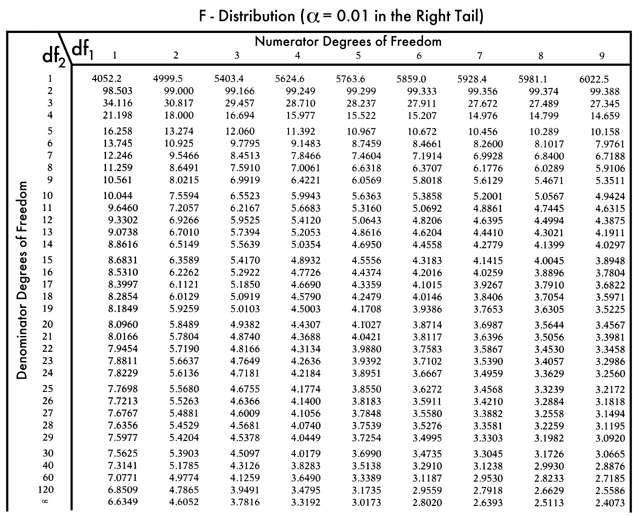

## Regresión lineal
Como hemos visto anteriormente, la regresión lineal es una técnica para modelar la relación entre una o más variables predictoras (o independientes) y una o más variables de respuesta (o dependientes). Nuestro objetivo al usar regresión lineal es explicar la relación utilizando una ecuación lineal:

$Y = {\beta}_{0} + {\beta}_{1}{X}_{1} + {\beta}_{2}{X}_{2} + ... + {\beta}_{n}{X}_{n}$

Usar la regresión lineal significa tener un modelo simple e interpretable a costa de perder información granular y potencialmente simplificar en exceso y aumentar nuestro error.

## Regresión lineal en Python
### Regresión lineal con `SciPy`
Hay muchas maneras de realizar regresiones en Python y esta lección tratará tanto de `SciPy` como `statsmodels`. Realizamos una regresión lineal en SciPy usando la función `linregress`. Esta función devuelve la pendiente, la constante, el valor r (que elevaremos al cuadrado para encontrar r-cuadrado), el valor p (esta prueba comprueba si la pendiente es significativamente diferente de cero), y el error estándar del gradiente estimado.

En el siguiente ejemplo, crearemos un modelo lineal que predice MPG usando aceleración en el conjunto de datos auto-mpg. Debemos tener en cuenta que `linregress` sólo soporta regresión lineal con una variable para x y otra para y.

El conjunto de datos auto-mpg.csv se puede obtener [aquí](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/auto-mpg.csv).

In [14]:
from scipy.stats import linregress

auto = pd.read_csv('./data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [18]:
linregress(auto.acceleration, auto.mpg)

LinregressResult(slope=1.1912045293502276, intercept=4.969793004253905, rvalue=0.42028891210165076, pvalue=1.8230915350787203e-18, stderr=0.129236432831014)

Esto significa que nuestra ecuación de regresión es:

mpg = 4.9698 + 1.1912 * aceleración

La r al cuadrado es 0.1766 que es relativamente pequeña. Esto significa que nuestro modelo sólo captura el 17% de la variación de los datos.

El valor p es muy pequeño, esto significa que la pendiente es significativamente diferente de cero.

### Regresión lineal utilizando `statsmodels`
A diferencia de SciPy, la salida que obtenemos con `statsmodels` es más detallada. A continuación, repetiremos el mismo ejemplo pero utilizando esta librería.

In [21]:
X = sm.add_constant(auto.acceleration) # We must add the intercept using the add_constant function
X.head()

,const,acceleration
0,1.0,12.0
1,1.0,11.5
2,1.0,11.0
3,1.0,12.0
4,1.0,10.5


In [22]:
Y = auto.mpg
Y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [23]:
model = sm.OLS(Y, X).fit()
model

In [24]:
predictions = model.predict(X) 
predictions.head()

0    19.264247
1    18.668645
2    18.073043
3    19.264247
4    17.477441
dtype: float64

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           1.82e-18
Time:                        11:45:19   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Aquí, no estamos limitados a una sola variable predictiva. Probemos esta regresión con más de un predictor.

In [26]:
X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']]) # adding a constant
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model.summary()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     306.7
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          1.14e-102
Time:                        11:45:52   Log-Likelihood:                -1142.9
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     394   BIC:                             2310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.3811      1.960     21.627      0.000      38.528      46.234
cylinders       -0.4827      0.302     -1.599      0.111      -1.076       0.111
weight          -0.0065      0.001    -11.342      0.000      -0.008      -0.005
acceleration     0.2034      0.091      2.236      0.026       0.025       0.382
==============================================================================
Omnibus:                       34.469   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.516
Skew:                           0.654   Prob(JB):                     1.31e-10
Kurtosis:                       4.016   Cond. No.                     2.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusión
En esta lección aprendimos a crear y evaluar una tabla ANOVA tanto en SciPy como statsmodels. Aprendimos el uso apropiado de una prueba F y qué hipótesis se prueba usando esta prueba. También se analizó la regresión lineal en SciPy y Statsmodels. Pudimos comparar el resultado de ambos. Ambos productos tienen un propósito diferente y tienen valor en diferentes escenarios. Esta lección le dará el poder de usar sus habilidades estadísticas para tomar decisiones de negocios.

## Apuntes Adicionales:
* [Anova de un factor](https://drive.google.com/file/d/1OGxGMjxk_QCK0jTYJ71Gav1i4I7deKyt)
* [Anova de dos factores](https://drive.google.com/file/d/1VyegAOoWwkDoHAsP5PXtyttqQtOeMDX6)
* [Anova de medidas repetidas](https://drive.google.com/file/d/1oR6wayZ7UqafrgPJq1UWkNiaIwSJMdbX)
* [Regresión lineal 1](https://drive.google.com/file/d/1v3c0FI4_v-Zdsl8xPkuGUgwK1wCS69fK)
* [Regresión lineal 2](https://drive.google.com/file/d/1pUyqZsKrNorhUOHgFJGLxeR_SLSweMk8)
* [Estadísticos no paramétricos](https://drive.google.com/open?id=1w1eU343qSP0qxvpMFc1yAlCsL3GOPW_T)